# Ongoing exploration of p-value and confidence intervals from simulations.

In this notebook, I'm aiming to reproduce various bits of different published papers, and also some original hypothesis testing and exploratory simulations. The topic of meta-research is extremely interesting, and this notebook is a critical investigation into statistical tools and metrics that scientits use every day for decision-making purposes and evaluation of their results.

In [51]:
import pandas as pd
import random
from matplotlib import pyplot as plt
import seaborn as sn
import numpy as np
import scipy.stats as stats
from scipy.stats import norm
from numpy import std, mean, sqrt
from scipy.stats import t
from meta_simulations import *
from displacement_s import displacement_calc
import plotly.graph_objects as go
import matplotlib.colors as mcolors
from matplotlib.colors import LinearSegmentedColormap

## Part 1. Generation of samples from simulated distributions. 

I'm aiming to generate random samples from different types of distribution, starting with gaussian one. This is because most of natural data is distributed normally, or (as you will see later on) approaches normality if sufficient large samples or number of samples are taken.

In [4]:
# This is the first method to generate a seed of 1000 values from a normal distribution with set parameters 
# The loop is iterating 1000 times and appending the random values with the random function/gauss method to an empty list

pop=[]
for i in range (1000):
    pop.append(random.gauss(0, 1))

# Here I make use of the numpy random.normal method to generate the same result

pop2 = np.random.normal(0, 1, 1000)
pop2 = list(pop2) #Here we have to transform the output of the np.random.normal method into a list, otherwise it won't be utilizable later on

### Plotting the data for visual proof

Here I needed the visual proof of normality. There are also statistical methods to assess a dataset for normality, but since we are talking about 1000 observation, visual proof will be more than enough.

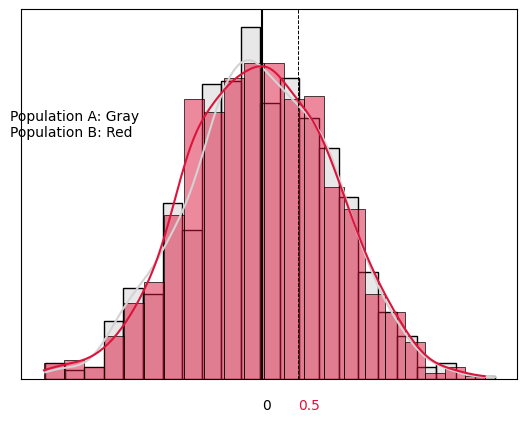

In [5]:
bins1 = sn.histplot(pop, color="lightgray", edgecolor="black", linewidth=1, kde=True)
plt.axvline(0,0,100,color="black")
bins1.axes.yaxis.set_visible(False)
bins1.axes.xaxis.set_visible(False)
plt.text(-3.5,80,'Population A: Gray\nPopulation B: Red',color="black")
plt.text(0,-10,'0',color="black")
plt.text(0.5,-10,'0.5',color="crimson")

bins2 = sn.histplot(pop2, color="crimson", edgecolor="black", linewidth=.5, kde=True)
plt.axvline(0.5,0,100,color="black", ls="dashed", lw=.7)

plt.savefig("popdistrinodifference.svg")

# Part 2: Creating the databases

This is the part where we call functions created in a separated .py file to create the databases through simulation. Count the p-values in the probability mass functions, and plot the graphs.

In [6]:
#Here instead we practically create 4 different dataframes with the simulation_p function

df10 = simulation_p(1000,1000,0,0.5,1,1,10,10)
df30 = simulation_p(1000,1000,0,0.5,1,1,30,30)
df60 = simulation_p(1000,1000,0,0.5,1,1,60,60)
df100 = simulation_p(1000,1000,0,0.5,1,1,100,100)


In [7]:
# Counting the number of p-values that are significative.

sig_values = pd.DataFrame({'Sign. values n10':[],'Sign. values n30':[], 'Sign. values n60':[], 'Sign. values n100':[]})
sig_values

,Sign. values n10,Sign. values n30,Sign. values n60,Sign. values n100


In [8]:
indexes = [0.5,0.1,0.05,0.01,0.001]

for values in indexes:
    sig_values.loc[values,:] = [counting_p(df10,values), counting_p(df30,values), counting_p(df60,values), counting_p(df100,values)]
    
sig_values

,Sign. values n10,Sign. values n30,Sign. values n60,Sign. values n100
0.500,652.0,909.0,981.0,1000.0
0.100,226.0,646.0,861.0,983.0
0.050,136.0,524.0,775.0,961.0
0.010,43.0,282.0,533.0,850.0
0.001,7.0,97.0,236.0,617.0


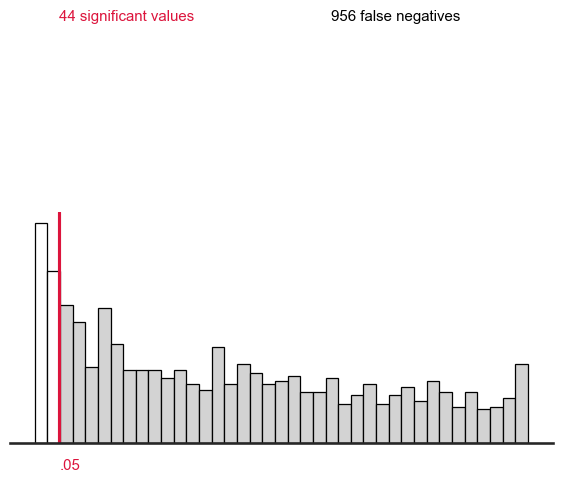

In [9]:
# plottling the same histogram with seaborn
custom_params = {"axes.spines.right": False, "axes.spines.top": False, "axes.spines.left": False, "figure.figsize":(7,3)}
sn.set_theme(context='talk', style='white', font='sans-serif', font_scale=.6, rc=custom_params)


plimit = 0.05

g = sn.histplot(x='p-value', data=df10, color="#FFF", edgecolor="black", bins=39)
plt.axvline(0.05, 0,1, color="Crimson")
plt.text(.05,150,'44 significant values', color="Crimson")
plt.text( .6,150,'956 false negatives', color="black")
plt.text(.05,-9.15,'.05',rotation=0, color="Crimson")
g.axes.yaxis.set_visible(False)
g.axes.xaxis.set_visible(False)

for rectangle in g.patches:
    if rectangle.get_x() >= plimit:
        rectangle.set_facecolor('LightGrey')
        


<AxesSubplot: xlabel='log10', ylabel='Count'>

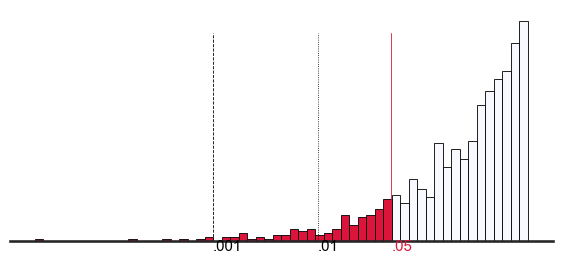

In [10]:
#plotting the same graph with sample size 10 but in a log10 scale

histogram_distribution(df10)
# plt.savefig("ttest10samples.svg")

<AxesSubplot: xlabel='log10', ylabel='Count'>

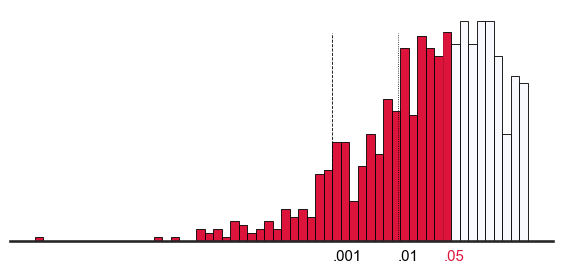

In [11]:
# Same Graph but for the 30 sample sizes

histogram_distribution(df30)        
# plt.savefig("ttest30samples.svg")

<AxesSubplot: xlabel='log10', ylabel='Count'>

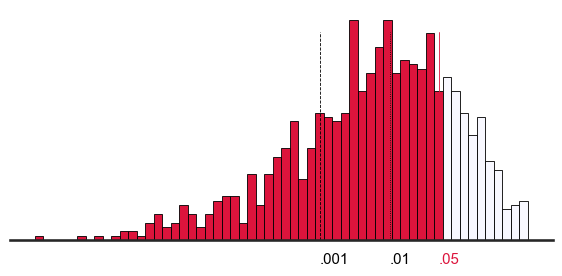

In [12]:
# Same Graph but for the 60 sample sizes

histogram_distribution(df60)
# plt.savefig("ttest60samples.svg")

<AxesSubplot: xlabel='log10', ylabel='Count'>

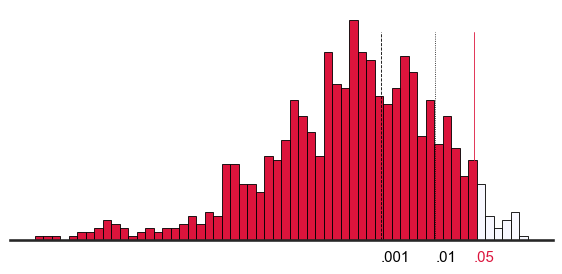

In [13]:
# Same Graph but for the 100 sample sizes

histogram_distribution(df100)
# plt.savefig("ttest100samples.svg")

Text(-0.8, 35, 'CI 95%:(-5.30, -1.48)\nExtremes gap: 3.81')

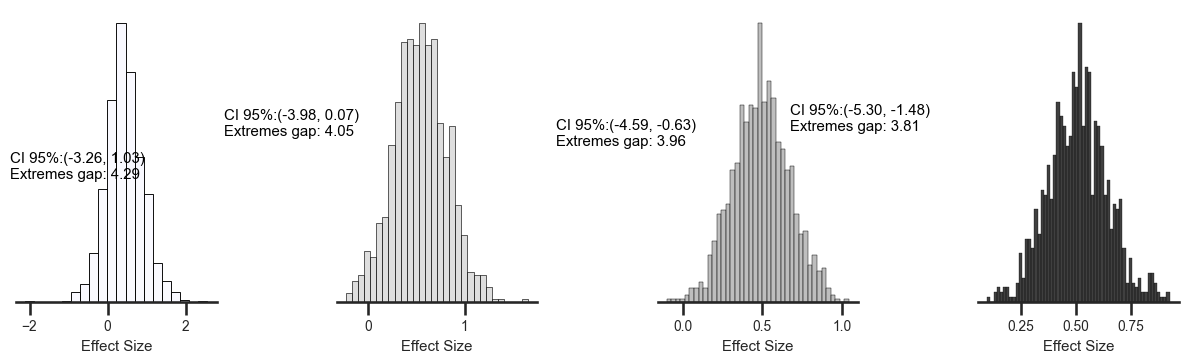

In [14]:
# Adjusting again the aesthetic paramethers of the seaborn theme to have a different result.
custom_params = {"axes.spines.right": False, "axes.spines.top": False, "axes.spines.left": False}
sn.set_theme(context='talk', style='ticks', font='sans-serif', font_scale=.6, rc=custom_params)

intervals = plt.figure(figsize=[15,3.8])
intervals.subplots_adjust(hspace=0.4, wspace=.6)
#This is the first graph of the grid
ax = intervals.add_subplot(1,4,1)
sn.histplot(data=df10, x="Effect Size", color="GhostWhite", edgecolor="black", bins=20)
ax.axes.yaxis.set_visible(False)
plt.text(-2.5,100,'CI 95%:(-3.26, 1.03)\nExtremes gap: 4.29', color="black")
#This is the second graph of the grid
ax = intervals.add_subplot(1,4,2)
sn.histplot(data=df30, x="Effect Size", color="LightGray", edgecolor="black", lw=.6, bins=30)
ax.axes.yaxis.set_visible(False)
plt.text(-1.5,55,'CI 95%:(-3.98, 0.07)\nExtremes gap: 4.05', color="black")
#This is the third graph of the grid
ax = intervals.add_subplot(1,4,3)
sn.histplot(data=df60, x="Effect Size", color="DarkGray", edgecolor="black", bins=40)
ax.axes.yaxis.set_visible(False)
plt.text(-0.8,46,'CI 95%:(-4.59, -0.63)\nExtremes gap: 3.96', color="black")
#This is the fourth graph of the grid
ax = intervals.add_subplot(1,4,4)
sn.histplot(data=df100, x="Effect Size", color="Black", edgecolor="black", bins=58)
ax.axes.yaxis.set_visible(False)
plt.text(-0.8,35,'CI 95%:(-5.30, -1.48)\nExtremes gap: 3.81', color="black")

# plt.savefig('CIgrid.svg')

In [15]:
#Just printing out some values that I need for the next graph.

log10_p = np.log10(0.05)
avg_gap10 = np.mean(df10['.95 Gap'])
avg_gap30 = np.mean(df30['.95 Gap'])
avg_gap60 = np.mean(df60['.95 Gap'])
avg_gap100 = np.mean(df100['.95 Gap'])

print(log10_p,avg_gap10,avg_gap30,avg_gap60,avg_gap100)

-1.3010299956639813 1.6198564473294903 0.9839203042811985 0.7140259658435091 0.5470952348593666


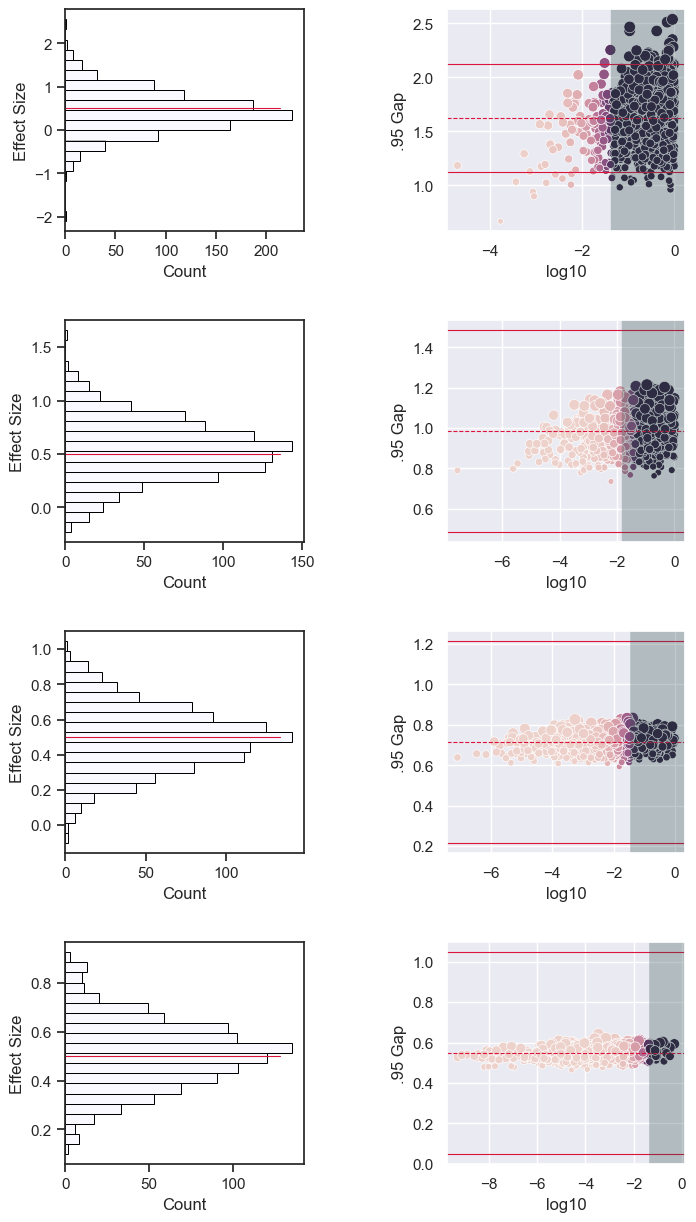

In [16]:
# Visualization of the distribution of p-values and effect sizes


density = plt.figure(figsize=[8,15])
density.subplots_adjust(hspace=0.4, wspace=.6)
#Graph number 1 histogram
sn.set_theme(style="ticks")
ay = density.add_subplot(4,2,1)
sn.histplot(data=df10, y="Effect Size", color="GhostWhite", edgecolor="black", bins=20)
plt.axhline(0.5, 0,.9, color="Crimson", lw=.8)
#Graph number 2 should be a density plot
sn.set_theme(style="darkgrid")
ay = density.add_subplot(4,2,2)
sn.scatterplot(data=df10, x="log10", y=".95 Gap", hue="p-value", size=".95 Gap", hue_norm=(0, 0.05), legend=False)
plt.axhline(avg_gap10, 0, 1, color="Crimson", lw=.8, ls="dashed")
plt.axhline((avg_gap10+0.5), 0, 1, color="Crimson", lw=.8)
plt.axhline((avg_gap10-0.5), 0, 1, color="Crimson", lw=.8)
plt.axvline(-0.55, 0, 1, color="DarkSlateGray", lw=55, alpha=.3)
#Graph number 3 should be a histogram
sn.set_theme(style="ticks")
ay = density.add_subplot(4,2,3)
sn.histplot(data=df30, y="Effect Size", color="GhostWhite", edgecolor="black", bins=20)
plt.axhline(0.5, 0,.9, color="Crimson", lw=.8)
#Graph number 4 should be a density plot
sn.set_theme(style="darkgrid")
ay = density.add_subplot(4,2,4)
sn.scatterplot(data=df30, x="log10", y=".95 Gap", hue="p-value", size=".95 Gap", hue_norm=(0, 0.05), legend=False)
plt.axhline(avg_gap30, 0, 1, color="Crimson", lw=.8, ls="dashed")
plt.axhline((avg_gap30+0.5), 0, 1, color="Crimson", lw=.8)
plt.axhline((avg_gap30-0.5), 0, 1, color="Crimson", lw=.8)
plt.axvline(-0.50, 0, 1, color="DarkSlateGray", lw=55, alpha=.3)
#Graph number 5 should be a histogram
sn.set_theme(style="ticks")
ay = density.add_subplot(4,2,5)
sn.histplot(data=df60, y="Effect Size", color="GhostWhite", edgecolor="black", bins=20)
plt.axhline(0.5, 0,.9, color="Crimson", lw=.8)
#Graph number 6 should be a density plot
sn.set_theme(style="darkgrid")
ay = density.add_subplot(4,2,6)
sn.scatterplot(data=df60, x="log10", y=".95 Gap", hue="p-value", size=".95 Gap", hue_norm=(0, 0.05), legend=False)
plt.axhline(avg_gap60, 0, 1, color="Crimson", lw=.8, ls="dashed")
plt.axhline((avg_gap60+0.5), 0, 1, color="Crimson", lw=.8)
plt.axhline((avg_gap60-0.5), 0, 1, color="Crimson", lw=.8)
plt.axvline(-0.45, 0, 1, color="DarkSlateGray", lw=45, alpha=.3)
#Graph number 7 should be a histogram
sn.set_theme(style="ticks")
ay = density.add_subplot(4,2,7)
sn.histplot(data=df100, y="Effect Size", color="GhostWhite", edgecolor="black", bins=20)
plt.axhline(0.5, 0,.9, color="Crimson", lw=.8)
#Graph number 8 should be a density plot
sn.set_theme(style="darkgrid")
ay = density.add_subplot(4,2,8)
sn.scatterplot(data=df100, x="log10", y=".95 Gap", hue="p-value", size=".95 Gap", hue_norm=(0, 0.05), legend=False)
plt.axhline(avg_gap100, 0, 1, color="Crimson", lw=.8, ls="dashed")
plt.axhline((avg_gap100+0.5), 0, 1, color="Crimson", lw=.8)
plt.axhline((avg_gap100-0.5), 0, 1, color="Crimson", lw=.8)
plt.axvline(-0.35, 0, 1, color="DarkSlateGray", lw=35, alpha=.3)

# plt.savefig('bigGreed.svg')

## Critique part: confidence intervals estimation with different sample sizes

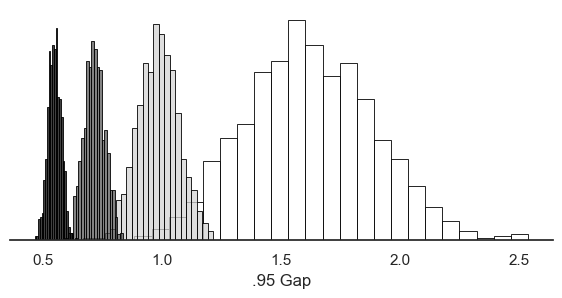

In [17]:
# Displaying the gap in the 95% CI at various sample sizes

sn.set_theme(style="white", rc=custom_params)
tr=sn.histplot(data=df10, x='.95 Gap', color="white", edgecolor="black", linewidth=.6)
sn.histplot(data=df30, x='.95 Gap', color="lightgray", edgecolor="black", linewidth=.6)
sn.histplot(data=df60, x='.95 Gap', color="#595959", edgecolor="black", linewidth=.6)
sn.histplot(data=df100, x='.95 Gap', color="black", edgecolor="black", linewidth=.6)
tr.axes.yaxis.set_visible(False)

# plt.savefig('gaps.svg')

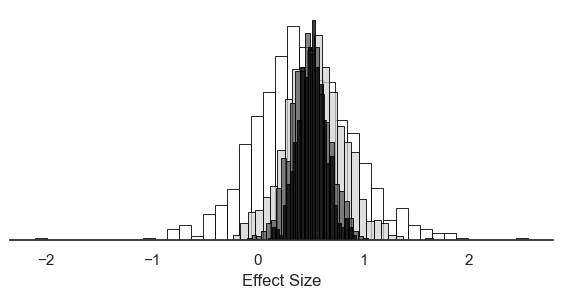

In [18]:
# Just a different way to display the narrowing of the confidence intervals. 
sn.set_theme(style="white", rc=custom_params)
tr=sn.histplot(data=df10, x='Effect Size', color="white", edgecolor="black", linewidth=.6)
sn.histplot(data=df30, x='Effect Size', color="lightgray", edgecolor="black", linewidth=.6)
sn.histplot(data=df60, x='Effect Size', color="#595959", edgecolor="black", linewidth=.6)
sn.histplot(data=df100, x='Effect Size', color="black", edgecolor="black", linewidth=.6)
tr.axes.yaxis.set_visible(False)

# plt.savefig('centrality.svg')

In [19]:
# Counting how many times the true value falls into a confidence interval, depending on sample size

def true_bound_counter(dataframe, value):
    counter = 0
    for i in range(len(dataframe['Upper Bound'])):
        if dataframe['Lower Bound'][i]< value < dataframe['Upper Bound'][i]:
            counter += 1
        else:
            continue
    return int(counter)
        

In [20]:
#Function creates a dataframe with the results of a nested function repeated over a list of dataframes, in our case the df10,30,60,100

#def results_counter(list_df,title_column,value):
#    memo = []
#    for i,name in enumerate(list_df):
#        res = true_bound_counter(name,value)
#        memo.append(res)
#    df = pd.DataFrame(memo, columns=[title_column], index=['10 Obs','30 Obs','60 Obs', '100 Obs'])
#    return df

def results_counter(list_df,title_column,value):
    memo = []
    for i,name in enumerate(list_df):
        res = true_bound_counter(name,value)
        memo.append(res)
    df = pd.DataFrame(memo, columns=[title_column], index=[f'Obs {i+2}' for i in range(len(list_df))])
    return df


In [21]:
df10e = simulation_p(1000,1000,0,0,1,1,10,10)
df30e = simulation_p(1000,1000,0,0,1,1,30,30)
df60e = simulation_p(1000,1000,0,0,1,1,60,60)
df100e = simulation_p(1000,1000,0,0,1,1,100,100)

In [22]:
true_dataframes = [df10,df30,df60,df100]
false_dataframes = [df10e,df30e,df60e,df100e]


example = results_counter(true_dataframes, 'True Effect', 0.5)
example2 = results_counter(false_dataframes, 'No Effect', 0)

intervals_precision = pd.concat([example,example2], axis=1)
intervals_precision

# intervals_precision.to_csv('CI_Precision.csv')

,True Effect,No Effect
Obs 2,971,903
Obs 3,948,935
Obs 4,960,952
Obs 5,955,970


In [23]:
example = results_counter(true_dataframes, 'True Effect', 0)
example2 = results_counter(false_dataframes, 'No Effect', 0.5)

intervals_accuracy = pd.concat([example,example2], axis=1)

# intervals_accuracy, not quite sure what I was thinking when I wrote this code. What am I looking for here?


# Part 2: sampling from the same population.
### Null hypothesis being true

In [24]:
df10e = simulation_p(1000,1000,0,0,1,1,10,10)
df30e = simulation_p(1000,1000,0,0,1,1,30,30)
df60e = simulation_p(1000,1000,0,0,1,1,60,60)
df100e = simulation_p(1000,1000,0,0,1,1,100,100)

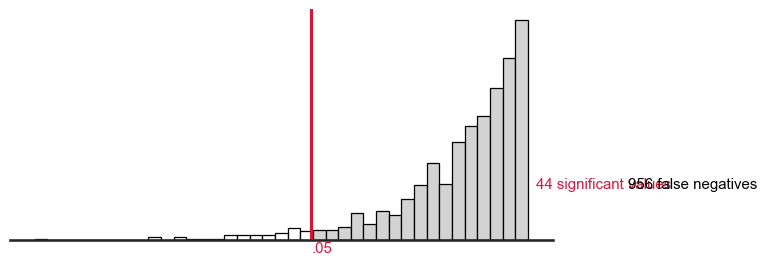

In [25]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False, "axes.spines.left": False, "figure.figsize":(7,3)}
sn.set_theme(context='talk', style='white', font='sans-serif', font_scale=.6, rc=custom_params)

g = sn.histplot(x='log10', data=df30e, color="#FFF", edgecolor="black", bins=39)
plt.axvline(-1.3, 0,1, color="Crimson")
plt.text(.05,40,'44 significant values', color="Crimson")
plt.text( .6,40,'956 false negatives', color="black")
plt.text(-1.3,-9.15,'.05',rotation=0, color="Crimson")
g.axes.yaxis.set_visible(False)
g.axes.xaxis.set_visible(False)

for rectangle in g.patches:
    if rectangle.get_x() >= -1.3:
        rectangle.set_facecolor('LightGrey')

In [26]:
# Counting the number of p-values that are significative.

sig_values_e = pd.DataFrame({'Sign. values n10':[],'Sign. values n30':[], 'Sign. values n60':[], 'Sign. values n100':[]})


indexes = [0.5,0.1,0.05,0.01,0.001]

for values in indexes:
    sig_values_e.loc[values,:] = [counting_p(df10e,values), counting_p(df30e,values), counting_p(df60e,values), counting_p(df100e,values)]
    
sig_values_e
# sig_values.to_csv('Table 2.csv')

,Sign. values n10,Sign. values n30,Sign. values n60,Sign. values n100
0.500,504.0,486.0,498.0,474.0
0.100,103.0,87.0,88.0,80.0
0.050,50.0,45.0,40.0,41.0
0.010,8.0,5.0,7.0,8.0
0.001,0.0,0.0,1.0,2.0


In [27]:
#Just printing out some values that I need for the next graph.

log10_p = np.log10(0.05)
avg_gap10e = np.mean(df10e['.95 Gap'])
avg_gap30e = np.mean(df30e['.95 Gap'])
avg_gap60e = np.mean(df60e['.95 Gap'])
avg_gap100e = np.mean(df100e['.95 Gap'])

print(log10_p,avg_gap10,avg_gap30,avg_gap60,avg_gap100)

-1.3010299956639813 1.6198564473294903 0.9839203042811985 0.7140259658435091 0.5470952348593666


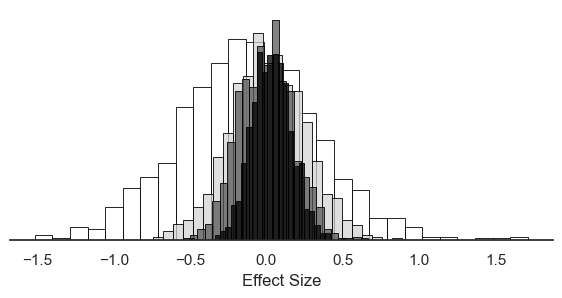

In [28]:
# Displaying the gap in the 95% CI at various sample sizes

sn.set_theme(style="white", rc=custom_params)
tr=sn.histplot(data=df10e, x='Effect Size', color="white", edgecolor="black", linewidth=.6)
sn.histplot(data=df30e, x='Effect Size', color="lightgray", edgecolor="black", linewidth=.6)
sn.histplot(data=df60e, x='Effect Size', color="#595959", edgecolor="black", linewidth=.6)
sn.histplot(data=df100e, x='Effect Size', color="black", edgecolor="black", linewidth=.6)
tr.axes.yaxis.set_visible(False)

# plt.savefig('gaps_e.svg')

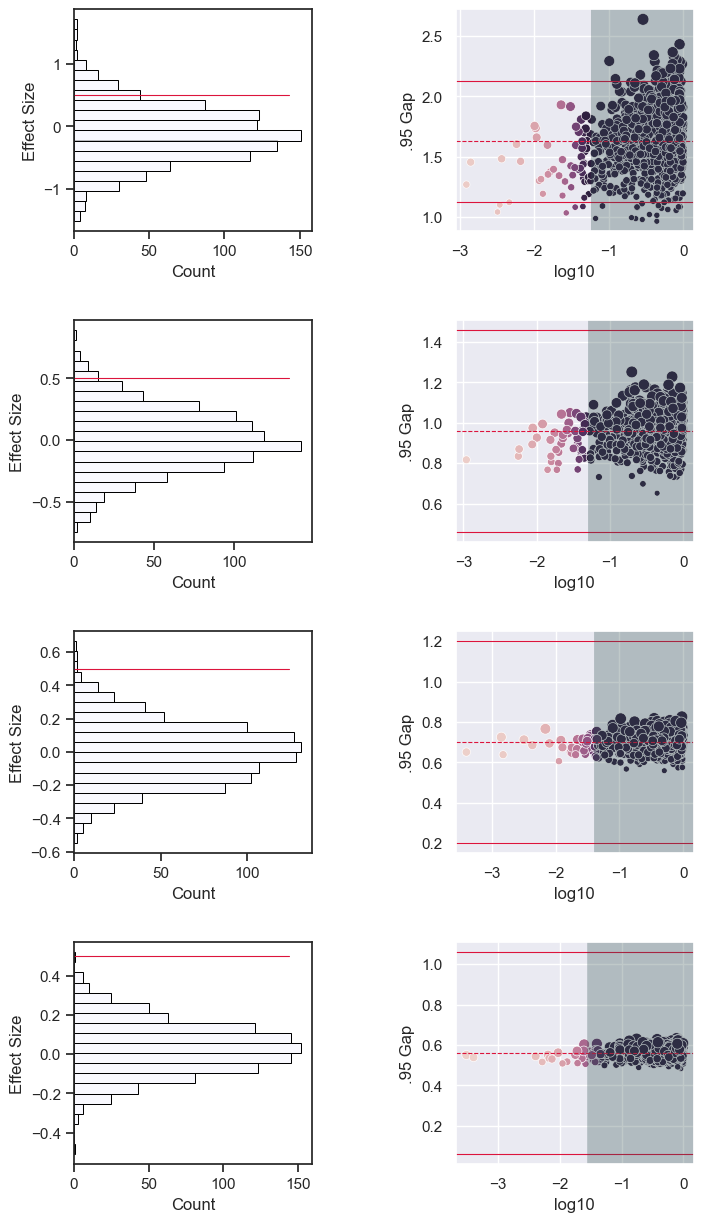

In [29]:
# Visualization of the distribution of p-values and effect sizes


density = plt.figure(figsize=[8,15])
density.subplots_adjust(hspace=0.4, wspace=.6)
#Graph number 1 histogram
sn.set_theme(style="ticks")
ay = density.add_subplot(4,2,1)
sn.histplot(data=df10e, y="Effect Size", color="GhostWhite", edgecolor="black", bins=20)
plt.axhline(0.5, 0,.9, color="Crimson", lw=.8)
#Graph number 2 should be a density plot
sn.set_theme(style="darkgrid")
ay = density.add_subplot(4,2,2)
sn.scatterplot(data=df10e, x="log10", y=".95 Gap", hue="p-value", size=".95 Gap", hue_norm=(0, 0.05), legend=False)
plt.axhline(avg_gap10e, 0, 1, color="Crimson", lw=.8, ls="dashed")
plt.axhline((avg_gap10e+0.5), 0, 1, color="Crimson", lw=.8)
plt.axhline((avg_gap10e-0.5), 0, 1, color="Crimson", lw=.8)
plt.axvline(-0.45, 0, 1, color="DarkSlateGray", lw=85, alpha=.3)
#Graph number 3 should be a histogram
sn.set_theme(style="ticks")
ay = density.add_subplot(4,2,3)
sn.histplot(data=df30e, y="Effect Size", color="GhostWhite", edgecolor="black", bins=20)
plt.axhline(0.5, 0,.9, color="Crimson", lw=.8)
#Graph number 4 should be a density plot
sn.set_theme(style="darkgrid")
ay = density.add_subplot(4,2,4)
sn.scatterplot(data=df30e, x="log10", y=".95 Gap", hue="p-value", size=".95 Gap", hue_norm=(0, 0.05), legend=False)
plt.axhline(avg_gap30e, 0, 1, color="Crimson", lw=.8, ls="dashed")
plt.axhline((avg_gap30e+0.5), 0, 1, color="Crimson", lw=.8)
plt.axhline((avg_gap30e-0.5), 0, 1, color="Crimson", lw=.8)
plt.axvline(-0.30, 0, 1, color="DarkSlateGray", lw=105, alpha=.3)
#Graph number 5 should be a histogram
sn.set_theme(style="ticks")
ay = density.add_subplot(4,2,5)
sn.histplot(data=df60e, y="Effect Size", color="GhostWhite", edgecolor="black", bins=20)
plt.axhline(0.5, 0,.9, color="Crimson", lw=.8)
#Graph number 6 should be a density plot
sn.set_theme(style="darkgrid")
ay = density.add_subplot(4,2,6)
sn.scatterplot(data=df60e, x="log10", y=".95 Gap", hue="p-value", size=".95 Gap", hue_norm=(0, 0.05), legend=False)
plt.axhline(avg_gap60e, 0, 1, color="Crimson", lw=.8, ls="dashed")
plt.axhline((avg_gap60e+0.5), 0, 1, color="Crimson", lw=.8)
plt.axhline((avg_gap60e-0.5), 0, 1, color="Crimson", lw=.8)
plt.axvline(-0.25, 0, 1, color="DarkSlateGray", lw=105, alpha=.3)
#Graph number 7 should be a histogram
sn.set_theme(style="ticks")
ay = density.add_subplot(4,2,7)
sn.histplot(data=df100e, y="Effect Size", color="GhostWhite", edgecolor="black", bins=20)
plt.axhline(0.5, 0,.9, color="Crimson", lw=.8)
#Graph number 8 should be a density plot
sn.set_theme(style="darkgrid")
ay = density.add_subplot(4,2,8)
sn.scatterplot(data=df100e, x="log10", y=".95 Gap", hue="p-value", size=".95 Gap", hue_norm=(0, 0.05), legend=False)
plt.axhline(avg_gap100e, 0, 1, color="Crimson", lw=.8, ls="dashed")
plt.axhline((avg_gap100e+0.5), 0, 1, color="Crimson", lw=.8)
plt.axhline((avg_gap100e-0.5), 0, 1, color="Crimson", lw=.8)
plt.axvline(-0.15, 0, 1, color="DarkSlateGray", lw=125, alpha=.3)

# plt.savefig('big_greed_no.svg')

<AxesSubplot: xlabel='log10', ylabel='Count'>

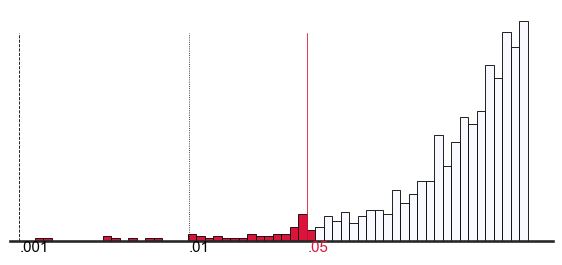

In [30]:
#Histogram distribution when sampling population is the same
sn.set_theme(context='talk', style='white', font='sans-serif', font_scale=.6, rc=custom_params)

histogram_distribution(df10e)
# plt.savefig('ttest10samplesno.svg')

<AxesSubplot: xlabel='log10', ylabel='Count'>

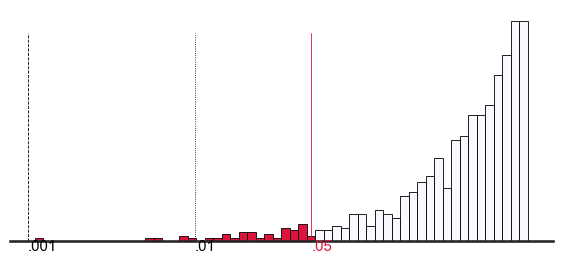

In [31]:
histogram_distribution(df30e)
# plt.savefig('ttest30samplesno.svg')

<AxesSubplot: xlabel='log10', ylabel='Count'>

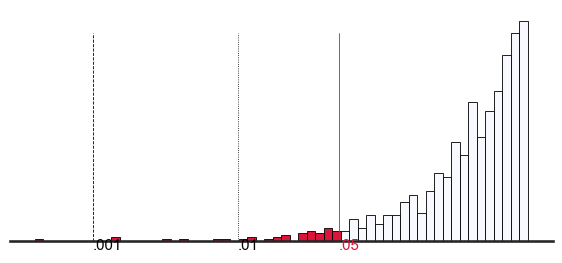

In [32]:
histogram_distribution(df60e)
# plt.savefig('ttest60samplesno.svg')

<AxesSubplot: xlabel='log10', ylabel='Count'>

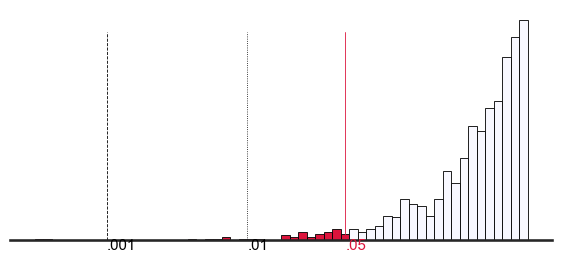

In [33]:
histogram_distribution(df100e)
# plt.savefig('ttest100samplesno.svg')

# Part 3: p-value as bits of information against the model?

In this part we will try to aid with actual data the suggestion made in the paper of Rafi & Greenland 2020, where the authors first claim the p-value as a compatibility measure (between the data and the model and its assumptions). From here they add how it could be better for young scientist to understand the p-value if translated in an informational framework and conceived as bits of information against the model and its assumptions.

In [34]:
# Creating a new dataset, with just the transformed values of the p-value in Shannon's information S-value.

def s_value(number):
    res = -(np.log2(number))
    return res

dictionary = {}
dataframes_id = ["10","30","60","100"]
frames = [df10,df30,df60,df100]
no_frames = [df10e,df30e,df60e,df100e]

for i,name in enumerate(frames):
    current = dataframes_id[i]
    dictionary['Observ_%s'%current] = s_value(name['p-value']) 
true_effect = pd.DataFrame.from_dict(dictionary)

for i,name in enumerate(no_frames):
    current = dataframes_id[i]
    dictionary['Observ_%s'%current] = s_value(name['p-value']) 
no_effect = pd.DataFrame.from_dict(dictionary)

true_effect

,Observ_10,Observ_30,Observ_60,Observ_100
0,4.540180,0.754442,4.705577,8.285767
1,5.311768,0.022796,11.006784,16.175620
2,2.824840,2.334614,9.274944,8.951918
3,4.465983,12.038688,19.117015,7.834353
4,0.160313,3.438861,14.732466,17.573536
...,...,...,...,...
995,2.297946,2.393633,7.024037,9.145927
996,4.158181,7.163082,4.902226,13.422507
997,0.729331,1.140321,7.941328,10.658274
998,2.676314,0.374210,3.629780,11.596085


Now that we have two separate dataframes with the Shannon Information s-values for 2 different scenarios (true difference, no difference) we can actually compare the differencese. And assess how these differences modify the perception based on sample size.

In [35]:
totals_true = pd.DataFrame({'Total 10 Observ':[], 'Total 30 Observ':[], 'Total 60 Observ':[], 'Total 100 Observ':[]})
totals_false = pd.DataFrame({'Total 10 Observ':[], 'Total 30 Observ':[], 'Total 60 Observ':[], 'Total 100 Observ':[]})

totals_true.loc[i,:] = [sum(true_effect['Observ_10']), sum(true_effect['Observ_30']), sum(true_effect['Observ_60']), sum(true_effect['Observ_100'])]
totals_false.loc[i,:] = [sum(no_effect['Observ_10']), sum(no_effect['Observ_30']), sum(no_effect['Observ_60']), sum(no_effect['Observ_100'])]

totals_false

,Total 10 Observ,Total 30 Observ,Total 60 Observ,Total 100 Observ
3,1441.567406,1348.438429,1384.41528,1327.282739


<AxesSubplot: ylabel='Observ_10'>

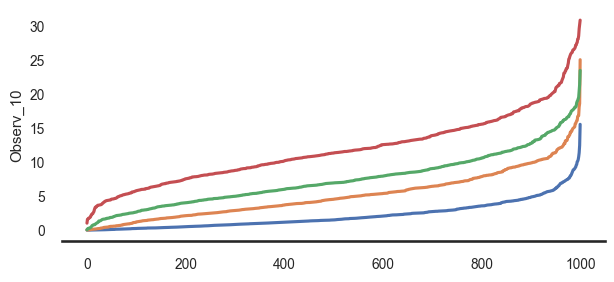

In [36]:
random = list(range(0,1000))


sn.lineplot(x=random, y= true_effect['Observ_10'].sort_values())
sn.lineplot(x=random, y= true_effect['Observ_30'].sort_values())
sn.lineplot(x=random, y= true_effect['Observ_60'].sort_values())
sn.lineplot(x=random, y= true_effect['Observ_100'].sort_values())

# plt.savefig('repeatedplots.svg')


<AxesSubplot: ylabel='Observ_10'>

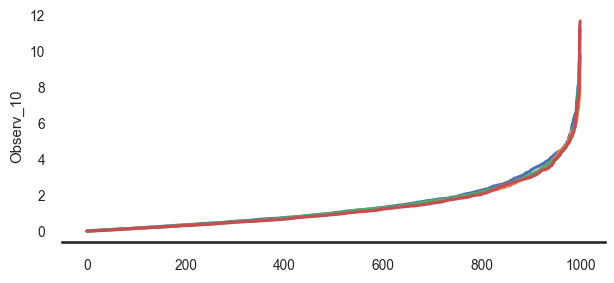

In [37]:
sn.lineplot(x=random, y= no_effect['Observ_10'].sort_values())
sn.lineplot(x=random, y= no_effect['Observ_30'].sort_values())
sn.lineplot(x=random, y= no_effect['Observ_60'].sort_values())
sn.lineplot(x=random, y= no_effect['Observ_100'].sort_values())

# plt.savefig('repeatedplotsno.svg')

In [38]:
#Calculating the value of inflation if sampling from two different populations

print(totals_true.iloc[0,0]/totals_true.iloc[0,0],
      totals_true.iloc[0,1]/totals_true.iloc[0,0],
      totals_true.iloc[0,2]/totals_true.iloc[0,0],
      totals_true.iloc[0,3]/totals_true.iloc[0,0])

print(totals_false.iloc[0,0]/totals_false.iloc[0,0],
      totals_false.iloc[0,1]/totals_false.iloc[0,0],
      totals_false.iloc[0,2]/totals_false.iloc[0,0],
      totals_false.iloc[0,3]/totals_false.iloc[0,0])

1.0 2.3650273479732644 3.4334039523060156 5.442899548536278
1.0 0.9353974177589307 0.960354177710046 0.9207219407261134


In [39]:
# I want to know for both scenarios, if sample sizes have different max and min values.

dictionary = ({'Min': [], 'Max': []})
indexes = ['True_10','True_30','True_60','True_100', 'No_10', 'No_30', 'No_60','No_100']

for columnName, columnData in true_effect.iteritems():
    dictionary['Min'].append(columnData.min())
    dictionary['Max'].append(columnData.max())

for columnName, columnData in no_effect.iteritems():
    dictionary['Min'].append(columnData.min())
    dictionary['Max'].append(columnData.max())


df = pd.DataFrame.from_dict(dictionary, orient="columns")
df.index = [indexes]

# df.to_csv('absolute_svalues')

C:\Users\Antonio Logarzo\AppData\Local\Temp\ipykernel_15184\596951782.py:6: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for columnName, columnData in true_effect.iteritems():
C:\Users\Antonio Logarzo\AppData\Local\Temp\ipykernel_15184\596951782.py:10: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for columnName, columnData in no_effect.iteritems():


In [56]:
dummy10, dev_010, dev10 = displacement_calc(0,0.5,1,1,10)
dummy30, dev_030, dev30 = displacement_calc(0,0.5,1,1,30)
dummy60, dev_060, dev60 = displacement_calc(0,0.5,1,1,60)
dummy100, dev_0100, dev100 = displacement_calc(0,0.5,1,1,100)


TypeError: displacement_calc() missing 1 required positional argument: 'samp_size'

In [ ]:
comprehensive = [dev10, dev30, dev60, dev100, dev_010, dev_030, dev_060, dev_0100]

for i in range(len(comprehensive)):
    comprehensive[i] = np.asarray(comprehensive[i])
    comprehensive[i][np.isnan(comprehensive[i])] = 0

dev10, dev30, dev60, dev100, dev_010, dev_030, dev_060, dev_0100 = comprehensive


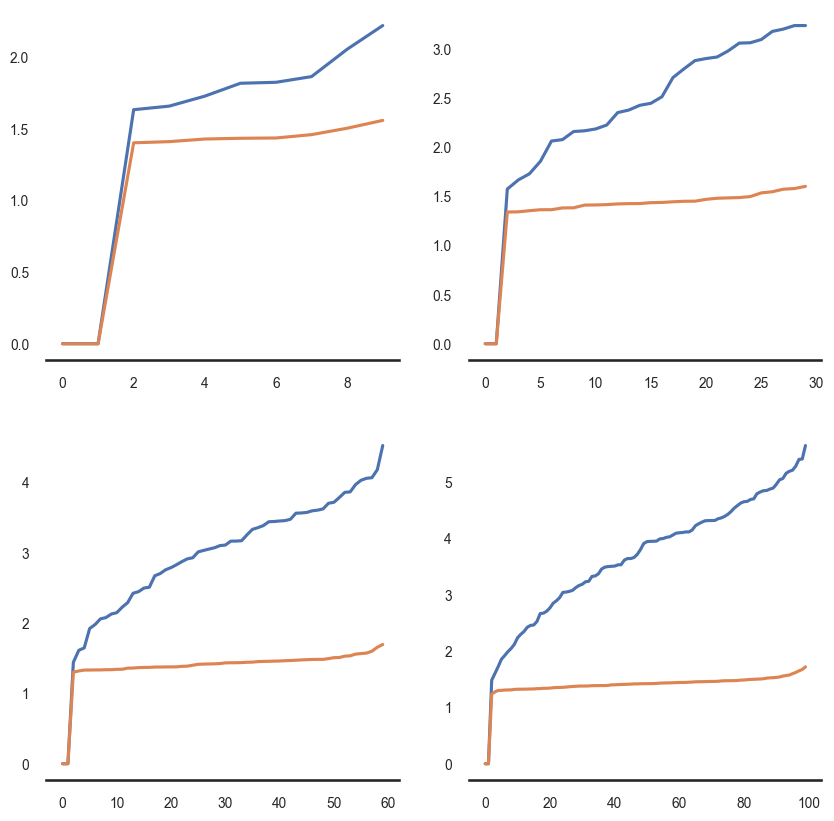

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# dev10 with dev_010
axs[0, 0].plot(sorted(dev10))
axs[0, 0].plot(sorted(dev_010))

# dev30 with dev_030
axs[0, 1].plot(sorted(dev30))
axs[0, 1].plot(sorted(dev_030))

# dev60 with dev_060
axs[1, 0].plot(sorted(dev60))
axs[1, 0].plot(sorted(dev_060))

# dev100 with dev_0100
axs[1, 1].plot(sorted(dev100))
axs[1, 1].plot(sorted(dev_0100))

plt.show()
# plt.savefig('InformationRate.svg')

# Part 4: Variation of confidence intervals precision to numerosity

In [ ]:
df_list1 = []
df_list0 = []

for i in range(2,100):
    df = simulation_p(1000,1000,0,0.5,1,1,i,i)
    df_list1.append(df)

for i in range(2,100):
    df = simulation_p(1000,1000,0,0,1,1,i,i)
    df_list0.append(df)

In [ ]:
example = results_counter(df_list1, 'True Effect', 0.5)
example2 = results_counter(df_list0, 'No Effect', 0)

intervals_precision_rate = pd.concat([example,example2], axis=1)
intervals_precision_rate

intervals_precision_rate.to_csv('intervals_precision_rate.csv')

In [ ]:
def list_counter(list_df, value):
    memo = []
    for i,name in enumerate(list_df):
        res = true_bound_counter(name,value)
        memo.append(res)
    return memo


In [ ]:
# Trying to obtain 2 different matrices. One from the true effect and another from the no effect. The concept here is to try and observe how much repetition impacts the results.

final_results = []

for j in range(2,101):
    df_list1 = []
    for i in range(2,101):
        df = simulation_p(1000,j,0,0.5,1,1,i,i)
        df_list1.append(df)
    example = results_counter(df_list1, 'True Effect', 0.5)
    final_results.append(example)

df_final = pd.concat(final_results, axis=1)
df_final.columns = [f'j={j}' for j in range(2,101)]

In [ ]:
ratio_df = df_final.div(np.arange(2, df_final.shape[1]+2), axis=1)

ratio_df = ratio_df.round(decimals=2)

# ratio_df.to_csv('ratio_df.csv')

In [ ]:
ratio_df0 = pd.read_csv('ratio_df0.csv', index_col=0, header=0)

In [ ]:
for i in ratio_df.columns:
    print(ratio_df[i].min())
    

In [ ]:
# Custom color gradient
colorscale = [[0, 'rgb(245, 245, 245)'], [0.05, 'rgb(230, 230, 230)'], [0.1, 'rgb(220, 220, 220)'], [0.15, 'rgb(210, 210, 210)'], [0.2, 'rgb(200, 200, 200)'], [0.25, 'rgb(190, 190, 190)'], [0.3, 'rgb(180, 180, 180)'], [0.35, 'rgb(170, 170, 170)'], [0.4, 'rgb(160, 160, 160)'], [0.45, 'rgb(150, 150, 150)'], [0.5, 'rgb(140, 140, 140)'], [0.55, 'rgb(130, 130, 130)'], [0.6, 'rgb(120, 120, 120)'], [0.65, 'rgb(110, 110, 110)'], [0.7, 'rgb(100, 100, 100)'], [0.75, 'rgb(90, 90, 90)'], [0.8, 'rgb(80, 80, 80)'], [0.85, 'rgb(70, 70, 70)'], [0.9, 'rgb(60, 60, 60)'], [0.95, 'rgb(50, 50, 50)'], [1, 'rgb(220, 20, 60)']]


# Create the surface plot
fig = go.Figure(data=[go.Surface(z=ratio_df.values, colorscale=colorscale)])
fig.update_layout(title='Proportion of true positives',
                  scene=dict(xaxis_title='Sample size',
                             yaxis_title='Population',
                             zaxis_title='Proportion'))

# Show the plot
fig.show()

# Write the plot to an html file
fig.write_html("surface_plot.html")

<AxesSubplot: >

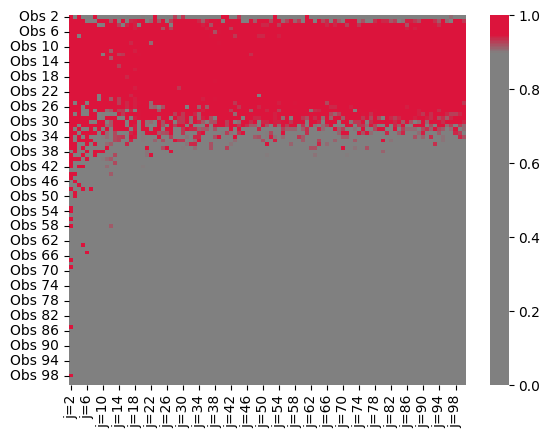

In [ ]:
colors = [[0, 'gray'], [0.8999, 'gray'], [0.9500, 'crimson'], [1, 'crimson']]
cmap = LinearSegmentedColormap.from_list("Custom_cmap", colors)

sn.heatmap(ratio_df0, cmap=cmap)

### Conclusion comments

The simulation succesfully showed how the p-values behave differently in the two different scenarios. The two scenarios are what, in theory, it is epistemologically true (either you sample from the same population, or from two different populations). However, the analysis here does not account for a lot of different scenarios that could manage to create noise in the readings (from actors bad practices to measuring tools defects).

It has been shown, that a collection of confidence intervals, indeed shows precision (not a singular CI, but a collection of repeating CIs). It has also been shown that given a true effect, p-value is the worst metric to assess its epistemological nature.